##**ANALYSIS OF POWER GENERATION IN UNITED STATES **

## Importing the required packages into the project

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import impute
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data =pd.read_csv('/content/drive/MyDrive/fuel_receipts_costs.csv',delimiter=',')
print(data.head())

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   rowid  plant_id_eia plant_id_eia_label report_date contract_type_code  \
0      1             3              Barry  2008-01-01                  C   
1      2             3              Barry  2008-01-01                  C   
2      3             3              Barry  2008-01-01                  C   
3      4             7            Gadsden  2008-01-01                  C   
4      5             7            Gadsden  2008-01-01                  S   

  contract_type_code_label contract_expiration_date energy_source_code  \
0                        C               2008-04-01                BIT   
1                        C               2008-04-01                BIT   
2                        C                      NaN                 NG   
3                        C               2015-12-01                BIT   
4                        S               2008-11-01                BIT   

  energy_source_code_label fuel_type_code_pudl  ...  \
0                      BIT                c

## Looking for NaN values from the data

In [ ]:
data.isnull().sum()

rowid                                            0
plant_id_eia                                     0
plant_id_eia_label                           11165
report_date                                      0
contract_type_code                             238
contract_type_code_label                       238
contract_expiration_date                    344302
energy_source_code                               1
energy_source_code_label                         1
fuel_type_code_pudl                              1
fuel_group_code                                  1
mine_id_pudl                                391947
mine_id_pudl_label                          391947
supplier_name                                    3
fuel_received_units                              0
fuel_mmbtu_per_unit                              0
sulfur_content_pct                               0
ash_content_pct                                  0
mercury_content_ppm                         289482
fuel_cost_per_mmbtu            

## Droping the un-wanted and categorical variables from the data

In [ ]:
data1=data.copy()
data1.drop(['rowid','plant_id_eia','plant_id_eia_label','report_date','contract_type_code','contract_type_code_label',
         'contract_expiration_date','energy_source_code','energy_source_code_label','fuel_group_code',
           'primary_transportation_mode_code'
          ,'primary_transportation_mode_code_label','secondary_transportation_mode_code','supplier_name',
           'secondary_transportation_mode_code_label','natural_gas_transport_code',
           'natural_gas_delivery_contract_type_code','report_date','data_maturity','data_maturity_label', 'fuel_type_code_pudl' ] ,axis=1,inplace= True)

## Droping the NaN values from the Cleaned dataset which have 65066 rows and 10  variables.

In [ ]:
data1=data1.dropna()
data1

,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
315779,1038.0,1038.0,167498.0,21.284,0.55,7.60,0.000,3.978,0.00,0.0
315780,1038.0,1038.0,37259.0,22.634,0.36,7.70,0.000,1.849,0.00,0.0
315783,3106.0,3106.0,8157.0,25.177,1.81,13.20,0.000,3.678,3.91,0.0
315786,1038.0,1038.0,43585.0,21.284,0.55,7.60,0.000,4.345,0.00,0.0
315787,4019.0,4019.0,77250.0,23.948,1.33,12.60,0.000,3.997,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
608335,20.0,20.0,78353.0,18.090,0.22,4.57,0.000,2.290,26.56,0.0
608343,660.0,660.0,47191.0,16.160,0.35,5.30,0.093,0.814,31.65,0.0
608344,605.0,605.0,200719.0,16.100,0.28,4.70,0.000,0.891,32.29,0.0
608372,633.0,633.0,24744.0,12.400,0.63,11.30,0.108,2.695,37.25,0.0


## Taking 2 % of data from the new dataset which has 13013 Rows of data.

In [ ]:
dataset1 = data1.sample(13013)
dataset1

,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
533250,3967.0,3967.0,11.0,22.930,2.90,9.80,0.00,1.176,11.64,0.0
390707,4171.0,4171.0,5323.0,23.380,2.57,8.50,0.00,1.664,11.59,0.0
331865,1948.0,1948.0,32903.0,22.250,3.00,11.70,0.00,2.642,12.00,0.0
341679,20.0,20.0,15225.0,17.310,0.46,6.60,0.00,2.153,27.44,0.0
437623,2400.0,2400.0,13156.0,24.650,0.76,9.30,0.08,3.224,7.80,300.0
...,...,...,...,...,...,...,...,...,...,...
501482,21.0,21.0,28638.0,17.910,0.20,4.90,0.00,1.935,25.92,0.0
336027,4293.0,4293.0,3378.0,23.918,0.98,12.37,0.00,2.747,0.00,0.0
317441,20.0,20.0,12518.0,18.010,0.39,5.00,0.00,2.555,0.00,0.0
509418,135.0,135.0,217015.0,19.208,0.43,4.50,0.00,2.241,23.87,0.0


## Spliting the data into test and train.

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset1, test_size=0.30,random_state=14)

In [ ]:
columns=train[['mine_id_pudl', 'mine_id_pudl_label', 'fuel_received_units',
       'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct',
       'mercury_content_ppm', 'fuel_cost_per_mmbtu', 'moisture_content_pct',
       'chlorine_content_ppm']]

## Normalizing the train data.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
data2 = scaler.fit_transform(columns.to_numpy())
data2 = pd.DataFrame(train, columns=['mine_id_pudl', 'mine_id_pudl_label', 'fuel_received_units',
       'fuel_mmbtu_per_unit', 'sulfur_content_pct', 'ash_content_pct',
       'mercury_content_ppm', 'fuel_cost_per_mmbtu', 'moisture_content_pct',
       'chlorine_content_ppm'])
 
data2.head()

,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
511227,315.0,315.0,361053.0,17.913,0.80,20.30,0.000,2.744,14.50,0.0
383095,2590.0,2590.0,17234.0,24.888,0.66,9.84,0.000,2.029,7.31,0.0
501558,3867.0,3867.0,42870.0,23.565,2.67,8.30,0.000,1.666,10.99,0.0
504115,633.0,633.0,25093.0,14.100,0.58,9.50,0.000,2.289,32.15,0.0
563880,38.0,38.0,92769.0,16.510,0.40,5.00,0.087,1.444,31.11,69.0


## Applying Silhoutte Score Elbow to get optimum clusters to process data.

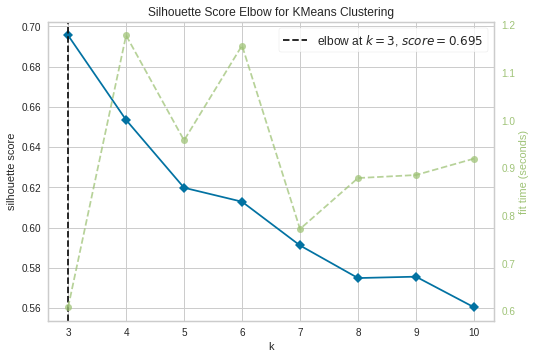

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(3,11),metric='silhouette', timings= True)
visualizer.fit(data2)       
visualizer.show()  

## Fitting data into 3 clusters

In [ ]:
import sklearn.cluster as cluster
K=range(3,11)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(data2)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [ ]:
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})
mycenters

,Clusters,WSS
0,3,1.002732e+13
1,4,6.216157e+12
2,5,4.073375e+12
3,6,3.000164e+12
4,7,2.190565e+12
5,8,1.667499e+12
6,9,1.315151e+12
7,10,1.084982e+12


In [ ]:
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=1200) 
kmeans.fit(data2)
cluster_ids=kmeans.predict(data2)
print(cluster_ids)


[1 0 0 ... 0 2 0]


In [ ]:
centroid=kmeans.cluster_centers_
data2_cluster=data2.copy()
data2_cluster["cluster"]=kmeans.fit_predict(data2)
data2_cluster.head()

,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm,cluster
511227,315.0,315.0,361053.0,17.913,0.80,20.30,0.000,2.744,14.50,0.0,1
383095,2590.0,2590.0,17234.0,24.888,0.66,9.84,0.000,2.029,7.31,0.0,0
501558,3867.0,3867.0,42870.0,23.565,2.67,8.30,0.000,1.666,10.99,0.0,0
504115,633.0,633.0,25093.0,14.100,0.58,9.50,0.000,2.289,32.15,0.0,0
563880,38.0,38.0,92769.0,16.510,0.40,5.00,0.087,1.444,31.11,69.0,2


## Plotting the Graphs based on the cluster values.

*** Plotting the graph betweeen Fuel_Cost and Ash_Content**

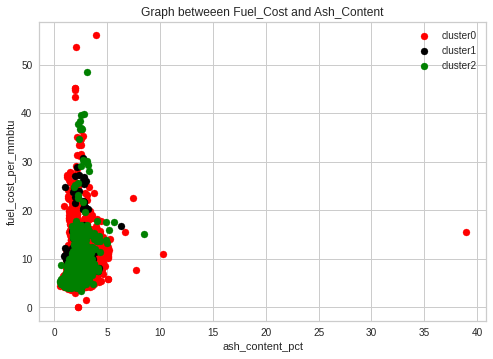

In [ ]:
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==0],data2.ash_content_pct[cluster_ids==0],c='red',label='cluster0')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==1],data2.ash_content_pct[cluster_ids==1],c='black',label='cluster1')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==2],data2.ash_content_pct[cluster_ids==2],c='green',label='cluster2')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='+',c='red',s=250,label='centroids')
plt.title('Graph betweeen Fuel_Cost and Ash_Content')
plt.xlabel('ash_content_pct')
plt.ylabel('fuel_cost_per_mmbtu')
plt.legend()
plt.show()

By seeing above graph, we can say that 

cluster 2 emits lower amount of ash content than the cluster 0 and cluster 1.



*** Plotting the graph betweeen Fuel_Cost and Sulfur_Content**

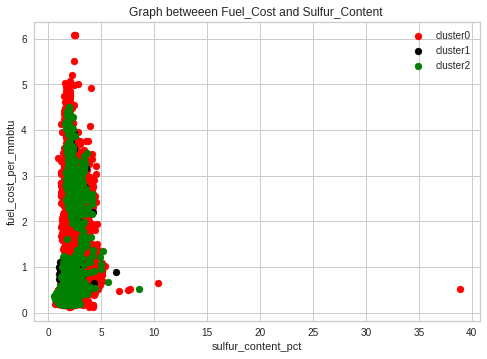

In [ ]:
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==0],data2.sulfur_content_pct[cluster_ids==0],c='red',label='cluster0')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==1],data2.sulfur_content_pct[cluster_ids==1],c='black',label='cluster1')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==2],data2.sulfur_content_pct[cluster_ids==2],c='green',label='cluster2')
plt.title('Graph betweeen Fuel_Cost and Sulfur_Content ')
plt.xlabel('sulfur_content_pct')
plt.ylabel('fuel_cost_per_mmbtu')
plt.legend()
plt.show()

By seeing above graph, we can say that

cluster 1 emits lower amount of sulfur content than the cluster 0 and cluster 2.

*** Plotting the graph betweeen Fuel_Cost and Mercury_Content**

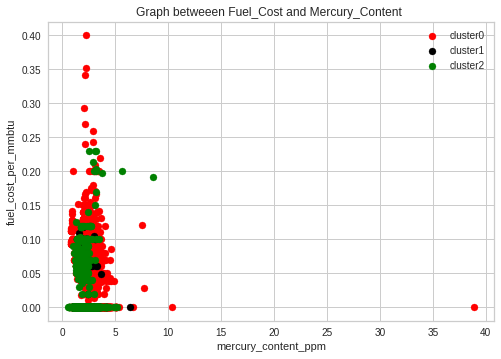

In [ ]:
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==0],data2.mercury_content_ppm[cluster_ids==0],c='red',label='cluster0')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==1],data2.mercury_content_ppm[cluster_ids==1],c='black',label='cluster1')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==2],data2.mercury_content_ppm[cluster_ids==2],c='green',label='cluster2')
plt.title('Graph betweeen Fuel_Cost and Mercury_Content ')
plt.xlabel('mercury_content_ppm')
plt.ylabel('fuel_cost_per_mmbtu')
plt.legend()
plt.show()

By seeing above graph, we can say that

cluster 2 emits lower amount of mercury content than the cluster 0 and cluster 1.

*** Plotting the graph betweeen Fuel_Cost and Moisture_Content**

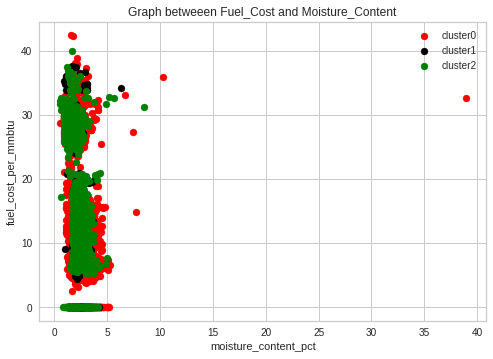

In [ ]:
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==0],data2.moisture_content_pct[cluster_ids==0],c='red',label='cluster0')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==1],data2.moisture_content_pct[cluster_ids==1],c='black',label='cluster1')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==2],data2.moisture_content_pct[cluster_ids==2],c='green',label='cluster2')
plt.title('Graph betweeen Fuel_Cost and Moisture_Content')
plt.xlabel('moisture_content_pct')
plt.ylabel('fuel_cost_per_mmbtu')
plt.legend()
plt.show()

By seeing above graph, we can say that

cluster 0 emits lower amount of moisture content than cluster 1 and cluster 2.

*** Plotting the graph betweeen Fuel_Cost and Chlorine_Content**

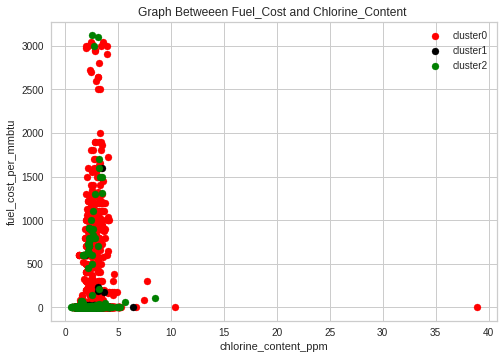

In [ ]:
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==0],data2.chlorine_content_ppm[cluster_ids==0],c='red',label='cluster0')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==1],data2.chlorine_content_ppm[cluster_ids==1],c='black',label='cluster1')
plt.scatter(data2.fuel_cost_per_mmbtu[cluster_ids==2],data2.chlorine_content_ppm[cluster_ids==2],c='green',label='cluster2')
plt.title('Graph Betweeen Fuel_Cost and Chlorine_Content ')
plt.xlabel('chlorine_content_ppm')
plt.ylabel('fuel_cost_per_mmbtu')
plt.legend()
plt.show()

By seeing above graph, we can say that

cluster 1 emits lower amount of chlorine content than cluster 0 and cluster 2.

In [ ]:
columns[cluster_ids==0].describe()


,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
count,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000,7174.000000
mean,1419.423195,1419.423195,26923.319626,21.140057,1.303814,8.024749,0.014444,2.308040,15.754456,49.165877
std,1630.205120,1630.205120,19786.575436,3.407660,1.208145,3.605003,0.034610,0.813037,10.340817,246.032489
min,11.000000,11.000000,10.000000,10.300000,0.120000,0.000000,0.000000,0.603000,0.000000,0.000000
25%,21.000000,21.000000,12321.000000,17.703250,0.270000,5.100000,0.000000,1.828000,6.790000,0.000000
50%,221.000000,221.000000,21401.000000,22.420500,0.790000,7.900000,0.000000,2.193000,12.190000,0.000000
75%,2797.000000,2797.000000,39624.750000,24.061500,2.570000,9.680000,0.000000,2.678000,26.710000,0.000000
max,4557.000000,4557.000000,77916.000000,28.000000,6.070000,56.000000,0.400000,38.889000,42.400000,3043.000000


From the above table, we can say that

The Mean values of the corresponding Variables.


1. Sulfur Cintent : 1.303
2. Ash Content    : 8.024 
3. Mercury Content : 0.014444
4. Fuel Cost : 2.308
5. Moisture Content : 15.754
6. Chlorine Cintent : 49.165


In [ ]:
columns[cluster_ids==1].describe()


,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,733.202658,733.202658,355441.083056,17.572362,0.704784,8.668605,0.014475,2.038302,23.055748,9.926910
std,1268.477419,1268.477419,120783.077418,3.130710,0.827801,5.568907,0.033127,0.636997,10.794917,100.257675
min,19.000000,19.000000,242936.000000,10.100000,0.180000,4.100000,0.000000,0.983000,0.000000,0.000000
25%,20.000000,20.000000,269677.000000,16.710000,0.250000,4.700000,0.000000,1.666000,13.800000,0.000000
50%,127.000000,127.000000,318447.000000,17.590000,0.360000,5.700000,0.000000,1.940000,27.160000,0.000000
75%,633.000000,633.000000,409882.000000,18.363000,0.800000,10.700000,0.000000,2.262000,29.700000,0.000000
max,4399.000000,4399.000000,935695.000000,26.450000,4.160000,30.700000,0.118000,6.366000,37.620000,1600.000000


From the above table, we can say that

The Mean values of the corresponding Variables.

1. Sulfur Cintent : 0.704
2. Ash Cintent : 8.668
3. Mercury Content : 0.014475
4. Fuel Cost :2.038
5. Moisture Content : 23.055
6. Chlorine Content : 9.926

In [ ]:
columns[cluster_ids==2].describe()


,mine_id_pudl,mine_id_pudl_label,fuel_received_units,fuel_mmbtu_per_unit,sulfur_content_pct,ash_content_pct,mercury_content_ppm,fuel_cost_per_mmbtu,moisture_content_pct,chlorine_content_ppm
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,806.654223,806.654223,128945.067319,19.288250,1.022564,7.208556,0.013974,2.070557,20.248213,26.212362
std,1329.786664,1329.786664,41386.693318,3.091573,1.176196,4.038887,0.033901,0.642604,10.005091,189.670865
min,18.000000,18.000000,77990.000000,9.848000,0.170000,3.300000,0.000000,0.539000,0.000000,0.000000
25%,20.000000,20.000000,95097.250000,17.230750,0.240000,4.800000,0.000000,1.671000,11.500000,0.000000
50%,42.000000,42.000000,118149.000000,17.860500,0.340000,5.600000,0.000000,2.034500,26.095000,0.000000
75%,703.500000,703.500000,156630.000000,22.243500,1.640000,8.600000,0.000000,2.362000,27.985000,0.000000
max,4522.000000,4522.000000,242126.000000,28.280000,4.510000,48.500000,0.230000,8.519000,40.000000,3121.000000


From the above table, we can say that

The Mean values of the corresponding Variables.

1. Sulfur Content :1.022
2. Ash Content : 7.208
3. Mercury Cintent : 0.0139
4. Fuel Cost : 2.070
5. Moisture Content : 20.24
6. Chlorine Content : 26.212

From the above three tables, we can say that


Cluster 2 powerplants generate power with lower emission of pollutants but they are spending more money on fuel costs than other powerplants in clusters 0 and 1.

Cluster 0 power plants generate power with moderate emission of pollutants but they are spending money on fuel costs moderately.

Cluster 1 power plants generate power with High emissions of pollutants but they are spending less money on fuel costs than cluster 0 and cluster 2.

I conclude that power plants use extra fuel to refine the emission of pollutants to the environment. You can see cluster 2 powerplants generate power with lower emission of pollutants by using extra fuel to refine the pollutants.

Final conclusion: An increase in fuel costs will lead to an increase in the operating costs of the power plants.



